<a href="https://colab.research.google.com/github/Chanchal-Gupta/Walmart_CaseStudy/blob/main/Walmart%20Case%20study_Chanchal%2005%20Dec%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chisquare, chi2_contingency, norm, ttest_1samp, ttest_ind, f_oneway, expon
import scipy.stats as stats

In [ ]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [ ]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
data.shape
#5.5 Million rows with 10 columns

(550068, 10)

In [ ]:
data.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
data.describe(include = 'object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
data.isna().sum()/len(data)*100
#No null values

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

<AxesSubplot:xlabel='Occupation'>

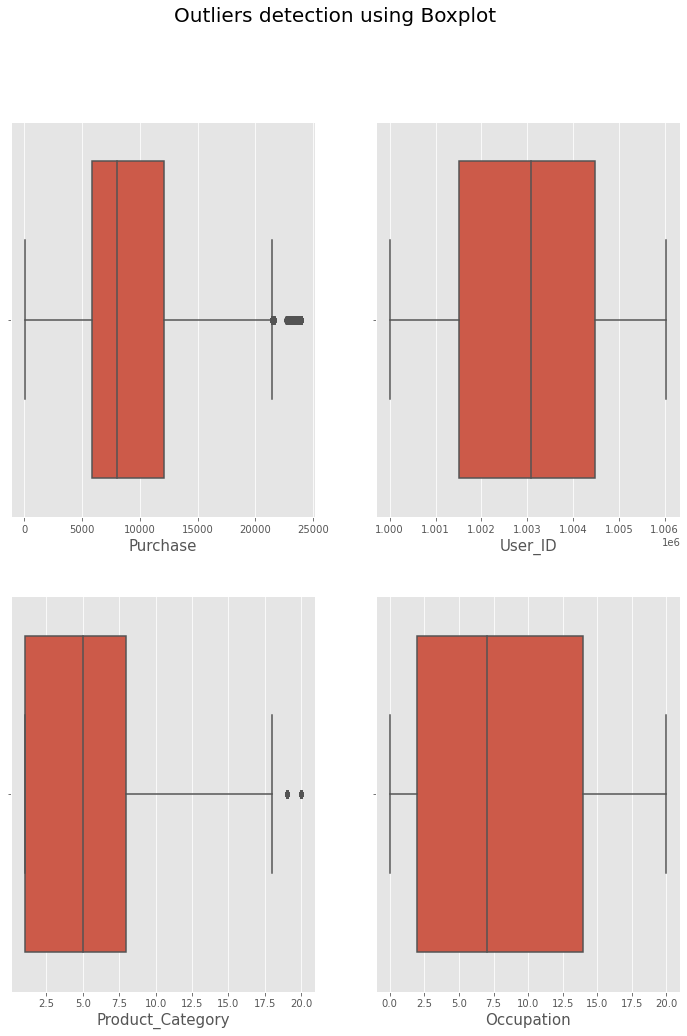

In [ ]:
plt.figure(figsize = (12, 16))
plt.suptitle('Outliers detection using Boxplot', fontsize = 20)

plt.subplot(2, 2, 1)
plt.xlabel('Purchase', fontsize = 15)
sns.boxplot(x = "Purchase", data = data)

plt.subplot(2, 2, 2)
plt.xlabel('User_ID', fontsize = 15)
sns.boxplot(x = "User_ID", data = data)

plt.subplot(2, 2, 3)
plt.xlabel('Product_Category', fontsize = 15)
sns.boxplot(x = "Product_Category", data = data)

plt.subplot(2, 2, 4)
plt.xlabel('Occupation', fontsize = 15)
sns.boxplot(x = "Occupation", data = data)

#No outliers observed in the figure

In [ ]:
data.dtypes
#Age, Stay_In_Current_City_Years is object

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
data['Gender'].value_counts()
#Total 414259 transactions was done by males and 135809 by females

M    414259
F    135809
Name: Gender, dtype: int64

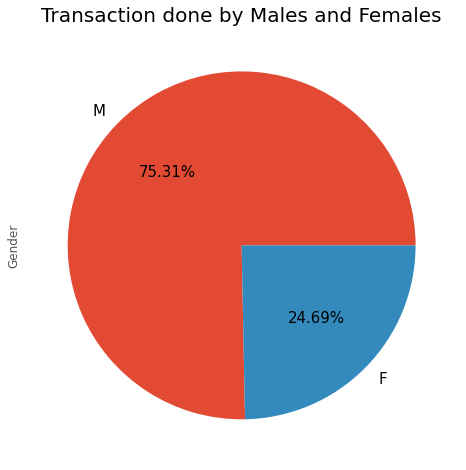

In [ ]:
Gender_percent = data['Gender'].value_counts()/len(data)*100
plt.figure(figsize=(8, 8))
Gender_percent.plot(kind='pie', y = Gender_percent, autopct='%.2f%%', fontsize = 15)
plt.title('Transaction done by Males and Females', fontsize = 20)
plt.show()
#Observation: Approximately 75% of the transactions were done by males and 25% by females in the given dataset

In [ ]:
#Total Unique Customers:
data['User_ID'].nunique()
#5891 are the unique customers

5891

In [ ]:
#Out of 5891 how many are males and how many are females?
data.groupby(['Gender'])['User_ID'].nunique()
#Females are 1666 and males are 4225, males are more than females but how much more?

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

# UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Occupation', ylabel='Count'>

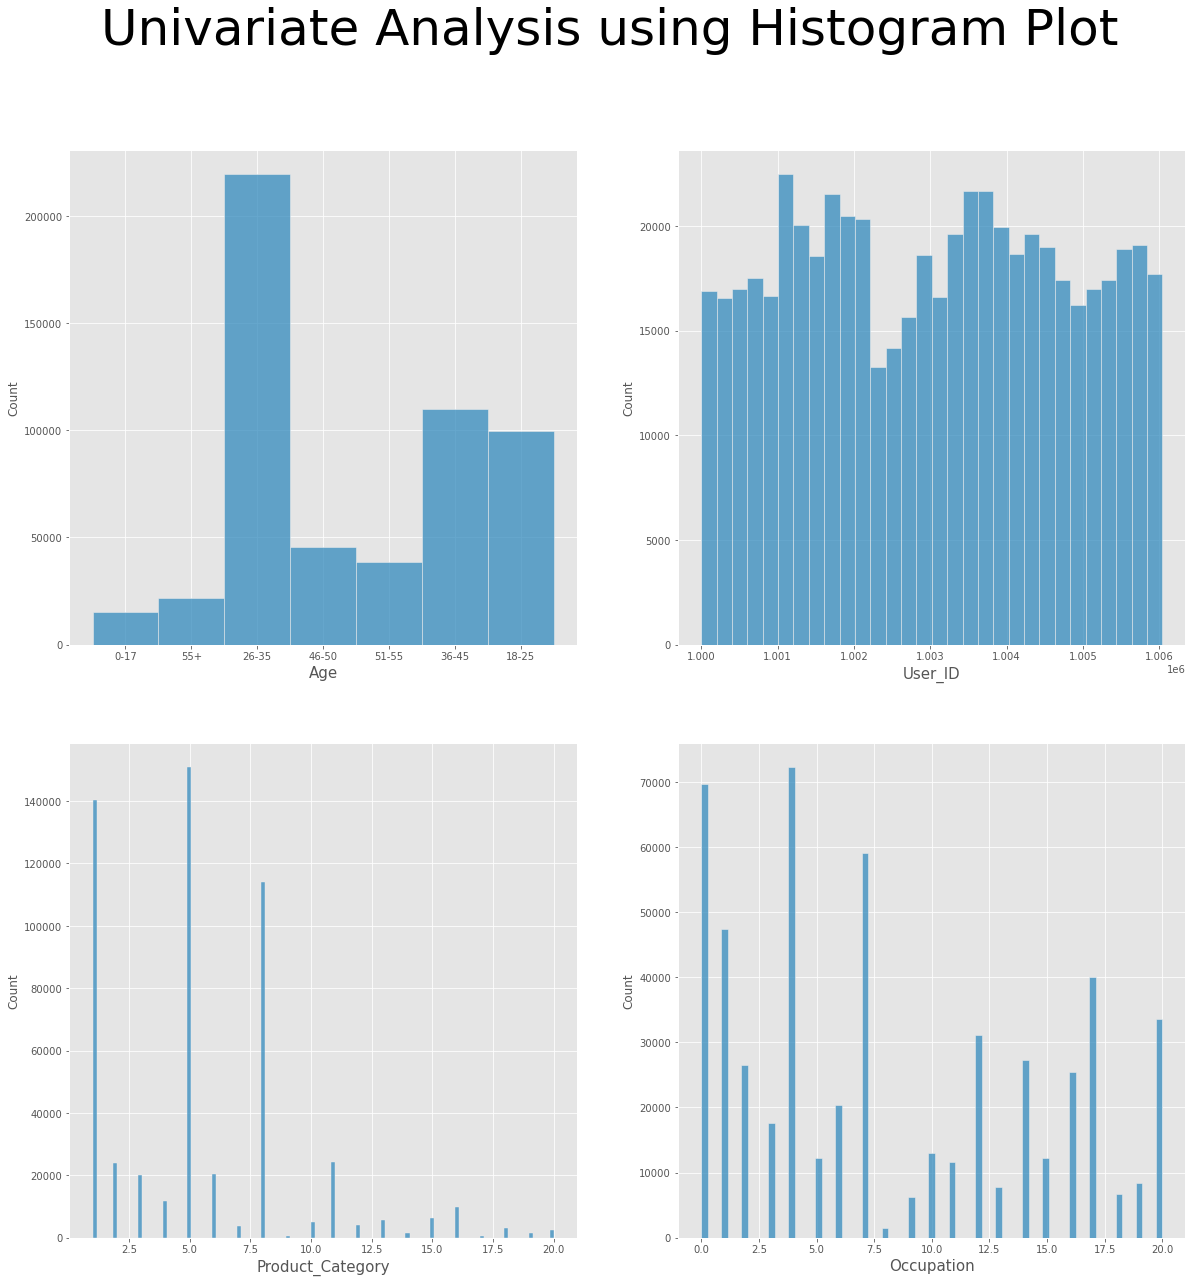

In [ ]:
plt.figure(figsize = (20, 20))
plt.suptitle('Univariate Analysis using Histogram Plot', fontsize = 50)

plt.subplot(2, 2, 1)
plt.xlabel('Age', fontsize = 15)
sns.histplot(x = "Age", data = data)

plt.subplot(2, 2, 2)
plt.xlabel('User_ID', fontsize = 15)
sns.histplot(x = "User_ID", bins = 30, data = data)

plt.subplot(2, 2, 3)
plt.xlabel('Product_Category', fontsize = 15)
sns.histplot(x = "Product_Category", data = data)

plt.subplot(2, 2, 4)
plt.xlabel('Occupation', fontsize = 15)
sns.histplot(x = "Occupation", data = data)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

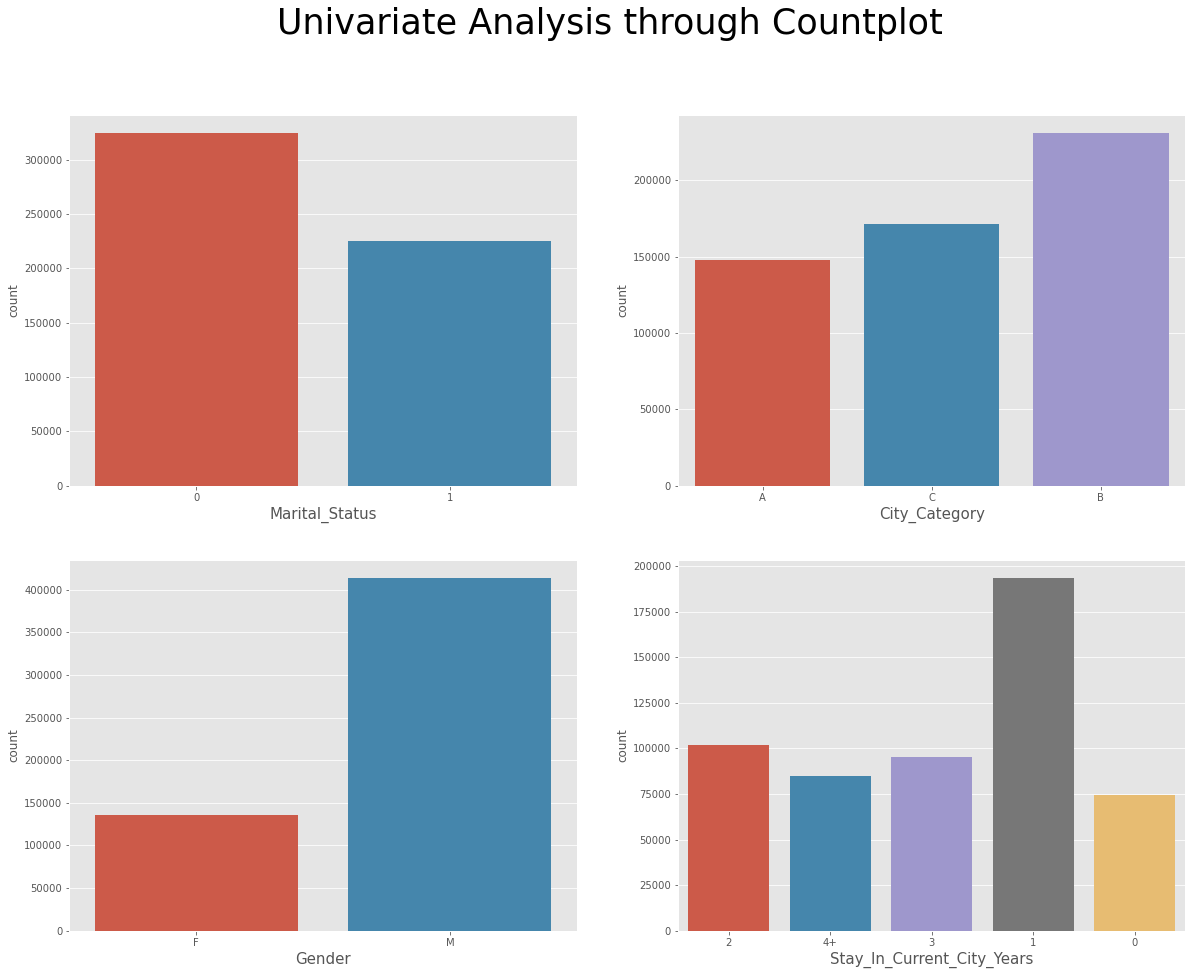

In [ ]:
plt.figure(figsize = (20, 15))
plt.suptitle('Univariate Analysis through Countplot', fontsize = 35)

plt.subplot(2, 2, 1)
plt.xlabel('Marital_Status', fontsize = 15)
sns.countplot(x = "Marital_Status", data = data)

plt.subplot(2, 2, 2)
plt.xlabel('City_Category', fontsize = 15)
sns.countplot(x = "City_Category", data = data)

plt.subplot(2, 2, 3)
plt.xlabel('Gender', fontsize = 15)
sns.countplot(x = "Gender", data = data)

plt.subplot(2, 2, 4)
plt.xlabel('Stay_In_Current_City_Years', fontsize = 15)
sns.countplot(x = "Stay_In_Current_City_Years", data = data)



# BIVARIATE ANALYSIS

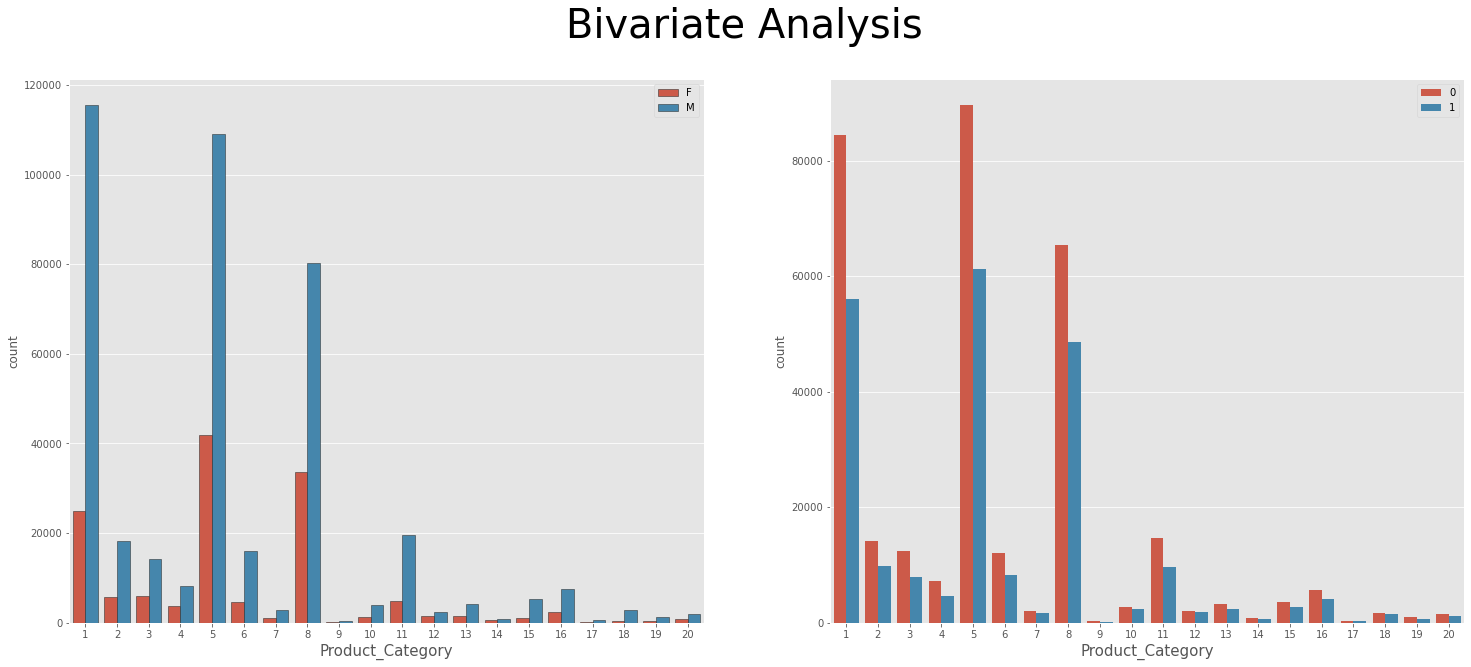

In [ ]:
plt.figure(figsize = (25, 10))
plt.suptitle('Bivariate Analysis', fontsize = 40)

plt.subplot(1, 2, 1)
plt.xlabel('Product_Category wrt Gender', fontsize = 15)
sns.countplot(data = data, x = "Product_Category", hue = "Gender", edgecolor="0.15")
plt.legend(loc = 'upper right')


plt.subplot(1, 2, 2)
plt.xlabel('Product_Category wrt Mariage', fontsize = 15)
sns.countplot(data = data, x = "Product_Category", hue = "Marital_Status")
plt.legend(loc = 'upper right')


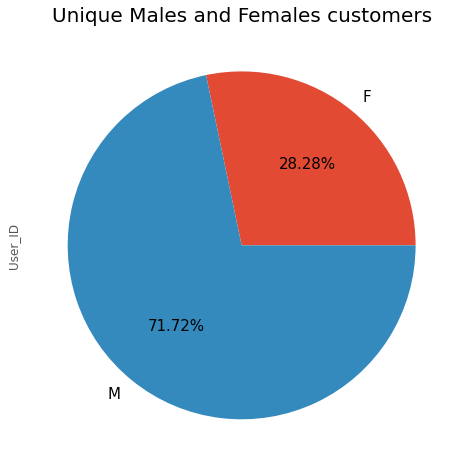

In [ ]:
Gender_percent = (data.groupby(['Gender'])['User_ID'].nunique()/data['User_ID'].nunique())*100
plt.figure(figsize=(8, 8))
Gender_percent.plot(kind='pie', y = Gender_percent, autopct='%.2f%%', fontsize = 15)
plt.title('Unique Males and Females customers', fontsize = 20)
plt.show()
#Observation: Approximately 72% are males and 28% are females in the given dataset

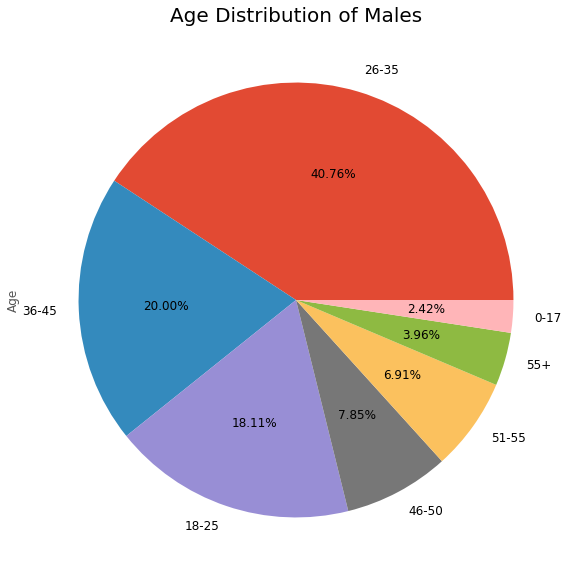

In [ ]:
plt.figure(figsize=(10, 10))
Male_population = data[data['Gender'] == 'M']
MaleAge_distn = Male_population['Age'].value_counts()/len(data)*100
MaleAge_distn.plot(kind = 'pie', y = MaleAge_distn, autopct='%.2f%%', fontsize = 12)
plt.title('Age Distribution of Males', fontsize = 20)
plt.show()


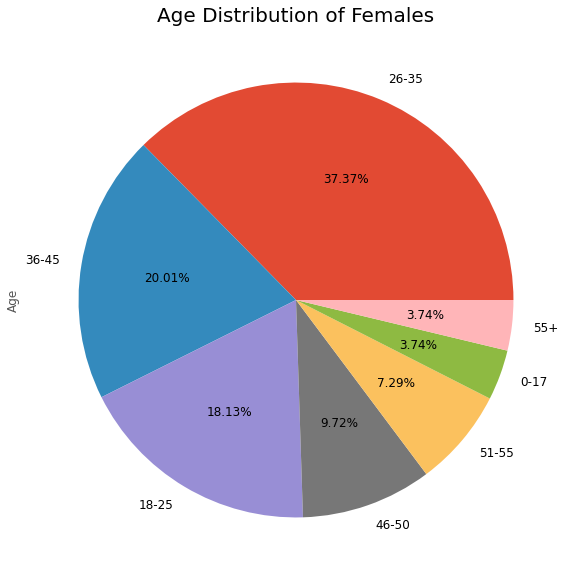

In [ ]:
plt.figure(figsize=(10, 10))
Female_population = data[data['Gender'] == 'F']
FemaleAge_distn = Female_population['Age'].value_counts()/len(data)*100
FemaleAge_distn.plot(kind = 'pie', y = FemaleAge_distn, autopct='%.2f%%', fontsize = 12)
plt.title('Age Distribution of Females', fontsize = 20)
plt.show()

# CORRELATION DATA

C:\Users\Chanchal Gupta\AppData\Local\Temp\ipykernel_24416\3584284474.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method = 'pearson'), square = True, annot = True, cmap = 'coolwarm')


<AxesSubplot:>

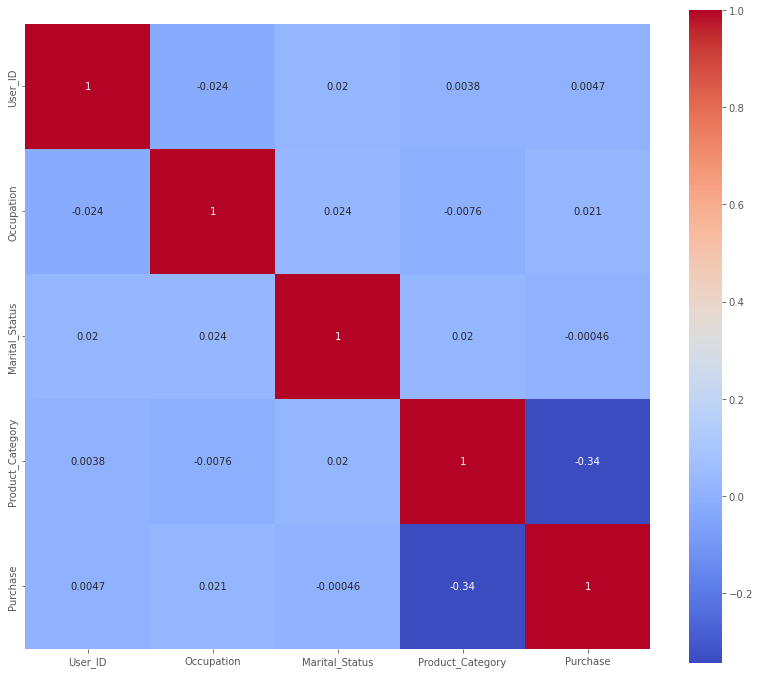

In [ ]:
plt.figure(figsize = (14, 12))
sns.heatmap(data.corr(method = 'pearson'), square = True, annot = True, cmap = 'coolwarm')


C:\Users\Chanchal Gupta\AppData\Local\Temp\ipykernel_24416\2790631011.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method = 'spearman'), square = True, annot = True, cmap = 'coolwarm')


<AxesSubplot:>

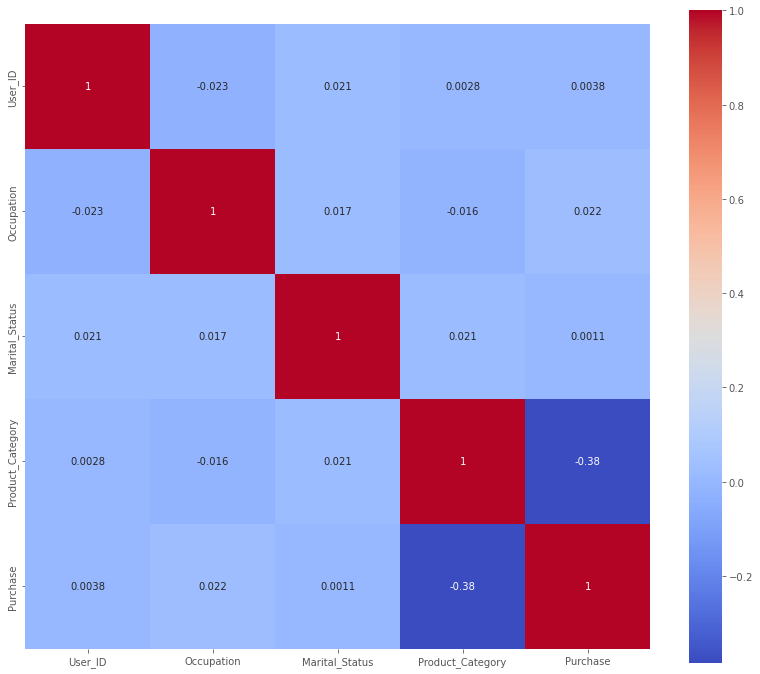

In [ ]:
plt.figure(figsize = (14, 12))
sns.heatmap(data.corr(method = 'spearman'), square = True, annot = True, cmap = 'coolwarm')


In [ ]:
#How many transactions done by unmarital?
data[data['Marital_Status']==0]['Gender'].value_counts()
#Males > Females

M    245910
F     78821
Name: Gender, dtype: int64

In [ ]:
#How many transactions done by marital?
data[data['Marital_Status']==1]['Gender'].value_counts()
#males > Females

M    168349
F     56988
Name: Gender, dtype: int64

In [ ]:
#Products are mostly ordered by Males?
MaritalStatus = pd.crosstab(data['Product_Category'], data['Gender'], normalize = 'index')*100
MaritalStatus

Gender,F,M
Product_Category,,
1,17.688669,82.311331
2,23.709353,76.290647
3,29.713551,70.286449
4,30.962307,69.037693
5,27.801077,72.198923
6,22.275970,77.724030
7,25.342650,74.657350
8,29.456221,70.543779
9,17.073171,82.926829


# Are women spending more money per transaction than men? Why or Why not?

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

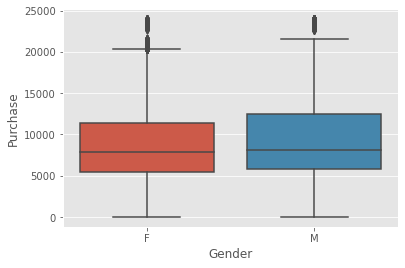

In [ ]:
sns.boxplot(x = 'Gender', y = 'Purchase', data = data)
#There is no major difference between males and females spending

In [ ]:
#Main data, will not change
data.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


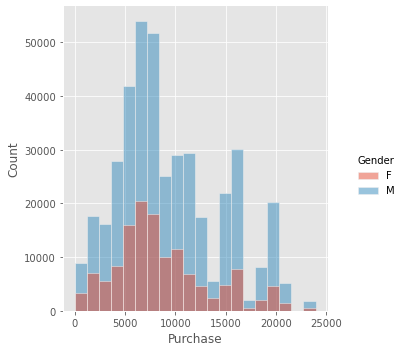

In [ ]:
GenderSpends = data[['Gender', 'Purchase']]
sns.displot(x = 'Purchase', data = GenderSpends, hue = 'Gender', bins = 20)
#This is not a normal distribution
#to check how the sample is related to population we will do CLT

In [ ]:
#randomly selecting 300 samples, this will change as an when you click
sample = GenderSpends.sample(1000)
sample.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,270.0,8610.574074,4581.051148,14.0,5370.75,7876.0,11412.25,20690.0
M,730.0,9257.576712,4984.396146,25.0,5492.00,8032.5,12001.25,23893.0


# GENDER VS PURCHASE

Enter the number of samples to be chosen randomly:1000
The average mean for randomly selected samples is  9438.1258214


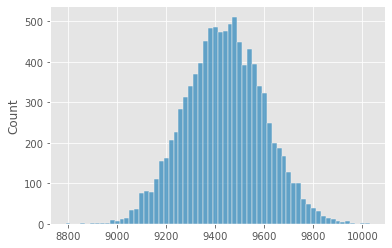

In [ ]:
M = int(input('Enter the number of samples to be chosen randomly:'))
Male_Data = data[data['Gender'] == 'M']
Average_Male_Spends = [Male_Data['Purchase'].sample(M, replace = True).mean() for i in range(10000)]
sns.histplot(Average_Male_Spends)
print('The average mean for randomly selected samples is ', np.mean(Average_Male_Spends))
#This is the Normal distribution

Enter the number of samples to be chosen randomly:1000
The average mean for randomly selected samples is  8733.623187199999


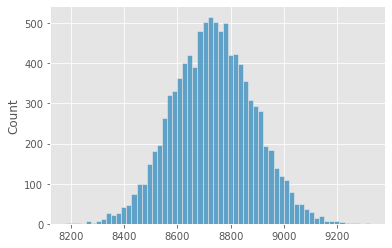

In [ ]:
F = int(input('Enter the number of samples to be chosen randomly:'))
Female_Data = data[data['Gender'] == 'F']
Average_Female_Spends = [Female_Data['Purchase'].sample(F, replace = True).mean() for i in range(10000)]
sns.histplot(Average_Female_Spends)
print('The average mean for randomly selected samples is ', np.mean(Average_Female_Spends))
#This is the Normal distribution


In [ ]:
#Confidence interval can be identified by z score or percentile

In [ ]:
#Using z score:
#NOTE: Here std deviation is of sample and not population, hence not divide by n

def cal_ci(Value,confidence):
    upper_limit = np.mean(Value) - norm.ppf((1-confidence/100)/2) * np.std(Value)
    lower_limit = np.mean(Value) + norm.ppf((1-confidence/100)/2) * np.std(Value)

    return lower_limit, upper_limit

#What is the confidence interval for 95%Confidence?
confidence = float(input())
print(f'At {confidence} Interval the Average spend by Male is', cal_ci(Average_Male_Spends,confidence))
print(f'At {confidence} Interval the Average spend by Female is', cal_ci(Average_Female_Spends,confidence))

95
At 95.0 Interval the Average spend by Male is (9125.569301321953, 9750.682341478048)
At 95.0 Interval the Average spend by Female is (8436.486840108448, 9030.75953429155)


In [ ]:
#Using Percentile:
print('Using percentile, At 95% Confidence Interval the Average spend by Male is', np.percentile(Average_Male_Spends, [2.5, 97.5]))
print('Using percentile, At 95% Confidence Interval the Average spend by Male is', np.percentile(Average_Female_Spends, [2.5, 97.5]))

Using percentile, At 95% Confidence Interval the Average spend by Male is [9124.58875 9749.73175]
Using percentile, At 95% Confidence Interval the Average spend by Male is [8441.872425 9030.324725]


In [ ]:
'''
OBSERVATIONS/INSIGHTS:

-> Overlappig was observed when randomly selected samples were less like 300

TO ELIMINATE OVERLAPPING:
-> Increase in Number of samples e.g., 1000 it tends to eliminates the overlapping in this case
-> The range of values gets closer with Decrease in the Confidence, overlapping can be eliminated

-> Womens are spending less than Males, the reason may be due to economic opportunities between males and females since
the Income is not mentioned we cannot conclude that.

'''

# Are unmarried spending more money per transaction than married? Why or Why not?

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

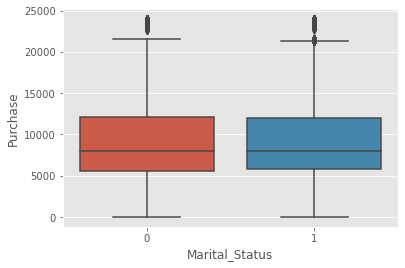

In [ ]:
sns.boxplot(x = 'Marital_Status', y = 'Purchase', data = data)
#There is no major difference in spending habits of Married and Unmarried

In [ ]:
#The Average spending habits is not significantly different irrespective of Marital Status
data.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


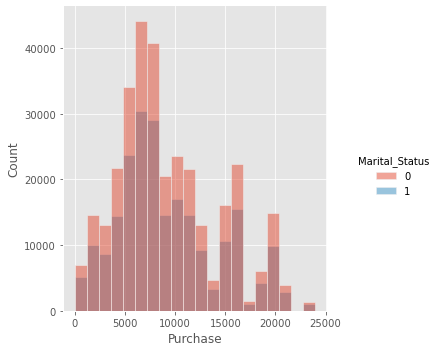

In [ ]:
MaritalSpends = data[['Marital_Status', 'Purchase']]
sns.displot(x = 'Purchase', data = MaritalSpends, hue = 'Marital_Status', bins = 20)
#This is not a normal distribution
#to check how the sample is related to population we will do CLT

# MARITAL STATUS VS PURCHASE

In [ ]:
#randomly selecting 300 samples, this will change as an when you click
sample = MaritalSpends.sample(1000)
sample.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,581.0,9096.445783,5088.983119,13.0,5419.0,8014.0,11939.0,23792.0
1,419.0,9250.178998,5003.273113,48.0,5896.0,8080.0,12138.0,23958.0


Enter the number of samples to be chosen randomly:1000
The average mean for randomly selected samples is  9265.6559863


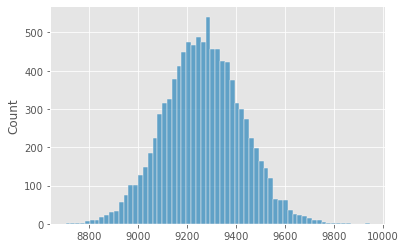

In [ ]:
Married = int(input('Enter the number of samples to be chosen randomly:'))
Married_Data = data[data['Marital_Status'] == 0]
Average_Married_Spends = [Married_Data['Purchase'].sample(Married, replace = True).mean() for i in range(10000)]
sns.histplot(Average_Married_Spends)
print('The average mean for randomly selected samples is ', np.mean(Average_Married_Spends))
#This is the Normal distribution

Enter the number of samples to be chosen randomly:1000
The average mean for randomly selected samples is  9266.3197373


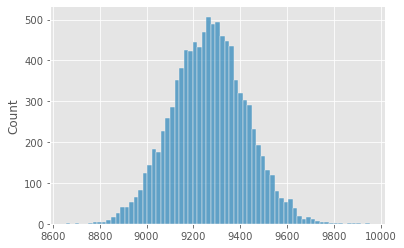

In [ ]:
Unmarried = int(input('Enter the number of samples to be chosen randomly:'))
Unmarried_Data = data[data['Marital_Status'] == 0]
Average_Unmarried_Spends = [Unmarried_Data['Purchase'].sample(Unmarried, replace = True).mean() for i in range(10000)]
sns.histplot(Average_Unmarried_Spends)
print('The average mean for randomly selected samples is ', np.mean(Average_Unmarried_Spends))
#This is the Normal distribution

In [ ]:
#Confidence interval can be identified by z score or percentile

In [ ]:
#Using z score:
#NOTE: Here std deviation is of sample and not population, hence not divide by n

def cal_ci(Value,confidence):
    upper_limit = np.mean(Value) - norm.ppf((1-confidence/100)/2) * np.std(Value)
    lower_limit = np.mean(Value) + norm.ppf((1-confidence/100)/2) * np.std(Value)

    return lower_limit, upper_limit

#What is the confidence interval for 95%Confidence?
confidence = float(input('Enter the % confidence interval:'))
print(f'At {confidence} % Confidence Interval the Average spend by Unmarried people is', cal_ci(Average_Unmarried_Spends,confidence))
print(f'At {confidence} % Confidence Interval the Average spend by Married people is', cal_ci(Average_Married_Spends,confidence))

Enter the % confidence interval:95
At 95.0 % Confidence Interval the Average spend by Unmarried people is (8956.664859333483, 9575.974615266518)
At 95.0 % Confidence Interval the Average spend by Married people is (8953.160734747227, 9578.151237852773)


In [ ]:
'''
OBSERVATIONS/INSIGHTS:

-> Overlappig was observed

TO ELIMINATE OVERLAPPING:
-> Increase in Number of samples
-> The range of values gets closer with Decrease in the Confidence, overlapping can be eliminated

'''

# AGE vs PURCHASE

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

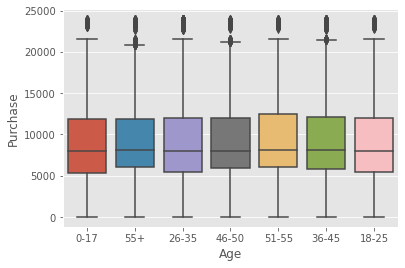

In [ ]:
sns.boxplot(x = 'Age', y = 'Purchase', data = data)
#There is no major difference in spending habits of Married and Unmarried

In [ ]:
data.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


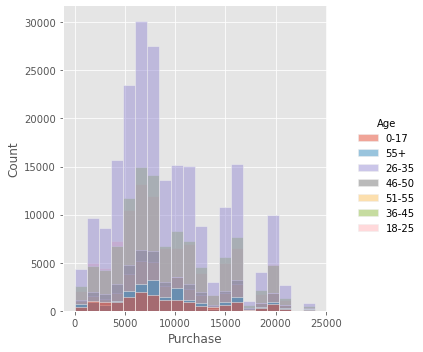

In [ ]:
Age_Spends = data[['Age', 'Purchase']]
sns.displot(x = 'Purchase', data = Age_Spends, hue = 'Age', bins = 20)
#This is not a normal distribution
#to check how the sample is related to population we will do CLT

In [ ]:
#randomly selecting 1000 samples, this will change as an when you click
sample = Age_Spends.sample(1000)
sample.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,26.0,9317.115385,6545.133199,388.0,5150.50,7035.5,15787.00,20793.0
18-25,153.0,9352.784314,5095.655416,587.0,5561.00,8161.0,13017.00,20907.0
26-35,395.0,9217.635443,5034.461804,26.0,5449.00,7980.0,12028.50,20976.0
36-45,223.0,9142.843049,4923.214375,762.0,5907.50,7933.0,12640.00,23279.0
46-50,78.0,8222.269231,4879.928988,48.0,5164.75,7819.0,11491.00,23073.0
51-55,72.0,8776.750000,4875.384191,37.0,5892.00,7877.5,9923.25,21325.0
55+,53.0,9222.547170,5467.113718,25.0,6058.00,7932.0,12011.00,20611.0


Enter the number of samples to be chosen randomly:1000
The average mean for randomly selected samples is  8930.6897681


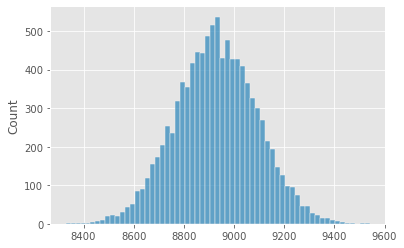

In [ ]:
Age = int(input('Enter the number of samples to be chosen randomly:'))
Age_Data = data[data['Age'] == '0-17']
Age_Spends = [Age_Data['Purchase'].sample(Age, replace = True).mean() for i in range(10000)]
sns.histplot(Age_Spends)
print('The average mean for randomly selected samples is ', np.mean(Age_Spends))
#This is the Normal distribution

The average mean for randomly selected samples is  9167.880292700002


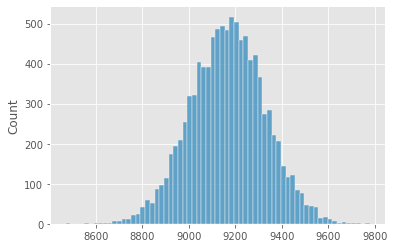

In [ ]:
Age_Data2 = data[data['Age'] == '18-25']
Age_Spends2 = [Age_Data2['Purchase'].sample(Age, replace = True).mean() for i in range(10000)]
sns.histplot(Age_Spends2)
print('The average mean for randomly selected samples is ', np.mean(Age_Spends2))
#This is the Normal distribution

The average mean for randomly selected samples is  9251.991360299999


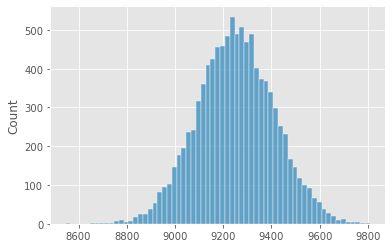

In [ ]:
Age_Data3 = data[data['Age'] == '26-35']
Age_Spends3 = [Age_Data3['Purchase'].sample(Age, replace = True).mean() for i in range(10000)]
sns.histplot(Age_Spends3)
print('The average mean for randomly selected samples is ', np.mean(Age_Spends3))
#This is the Normal distribution

The average mean for randomly selected samples is  9329.5723834


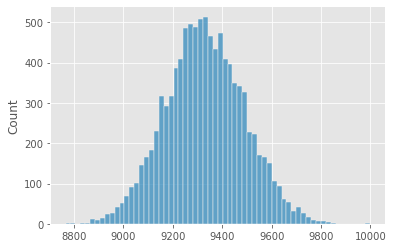

In [ ]:
Age_Data4 = data[data['Age'] == '36-45']
Age_Spends4 = [Age_Data4['Purchase'].sample(Age, replace = True).mean() for i in range(10000)]
sns.histplot(Age_Spends4)
print('The average mean for randomly selected samples is ', np.mean(Age_Spends4))
#This is the Normal distribution

The average mean for randomly selected samples is  9208.7526209


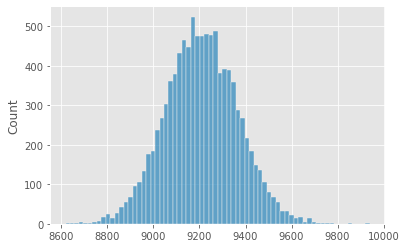

In [ ]:
Age_Data5 = data[data['Age'] == '46-50']
Age_Spends5 = [Age_Data5['Purchase'].sample(Age, replace = True).mean() for i in range(10000)]
sns.histplot(Age_Spends5)
print('The average mean for randomly selected samples is ', np.mean(Age_Spends5))
#This is the Normal distribution

The average mean for randomly selected samples is  9534.6121624


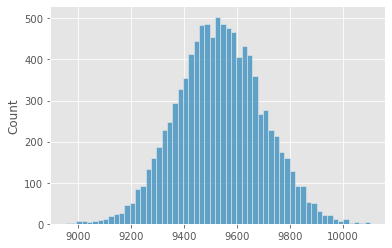

In [ ]:
Age_Data6 = data[data['Age'] == '51-55']
Age_Spends6 = [Age_Data6['Purchase'].sample(Age, replace = True).mean() for i in range(10000)]
sns.histplot(Age_Spends6)
print('The average mean for randomly selected samples is ', np.mean(Age_Spends6))
#This is the Normal distribution

The average mean for randomly selected samples is  9334.680548


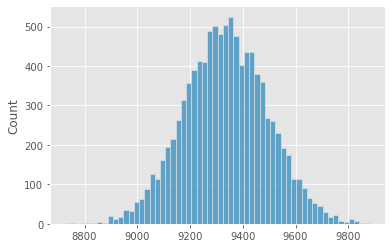

In [ ]:
Age_Data7 = data[data['Age'] == '55+']
Age_Spends7 = [Age_Data7['Purchase'].sample(Age, replace = True).mean() for i in range(10000)]
sns.histplot(Age_Spends7)
print('The average mean for randomly selected samples is ', np.mean(Age_Spends7))
#This is the Normal distribution

In [ ]:
#Using z score:
#NOTE: Here std deviation is of sample and not population, hence not divide by n

def cal_ci(Value,confidence):
    upper_limit = np.mean(Value) - norm.ppf((1-confidence/100)/2) * np.std(Value)
    lower_limit = np.mean(Value) + norm.ppf((1-confidence/100)/2) * np.std(Value)

    return lower_limit, upper_limit

#What is the confidence interval for 95%Confidence?
confidence = float(input('Enter the % confidence interval:'))
print(f'At {confidence} % Confidence Interval the Average spend by the Age group of 0-17 yrs', cal_ci(Age_Spends,confidence))
print(f'At {confidence} % Confidence Interval the Average spend by the Age group of 18-25 yrs', cal_ci(Age_Spends2,confidence))
print(f'At {confidence} % Confidence Interval the Average spend by the Age group of 26-35 yrs', cal_ci(Age_Spends3,confidence))
print(f'At {confidence} % Confidence Interval the Average spend by the Age group of 36-45 yrs', cal_ci(Age_Spends4,confidence))
print(f'At {confidence} % Confidence Interval the Average spend by the Age group of 46-50 yrs', cal_ci(Age_Spends5,confidence))
print(f'At {confidence} % Confidence Interval the Average spend by the Age group of 51-55 yrs', cal_ci(Age_Spends6,confidence))
print(f'At {confidence} % Confidence Interval the Average spend by the Age group of 55+ yrs', cal_ci(Age_Spends7,confidence))

Enter the % confidence interval:95
At 95.0 % Confidence Interval the Average spend by the Age group of 0-17 yrs (8613.562164475896, 9247.817371724102)
At 95.0 % Confidence Interval the Average spend by the Age group of 18-25 yrs (8853.935823662674, 9481.824761737329)
At 95.0 % Confidence Interval the Average spend by the Age group of 26-35 yrs (8940.194767743336, 9563.787952856661)
At 95.0 % Confidence Interval the Average spend by the Age group of 36-45 yrs (9017.626757229147, 9641.518009570853)
At 95.0 % Confidence Interval the Average spend by the Age group of 46-50 yrs (8900.43284498233, 9517.072396817672)
At 95.0 % Confidence Interval the Average spend by the Age group of 51-55 yrs (9216.6952843351, 9852.529040464902)
At 95.0 % Confidence Interval the Average spend by the Age group of 55+ yrs (9023.67419081036, 9645.686905189641)


In [ ]:
'''
OBSERVATIONS/INSIGHTS:

-> The Dataset of Walmart company is the transactional data of customers who purchased products from the Walmart
stores during Black Friday.

-> Dataset is a distribution of total 550068 rows with 10 columns.

-> User_ID is the detail of Each unique Customers and Product_ID is the ID of each unique Products. There are 3631 unique
Product ID.

-> From the Boxplot data, No null values were observed in the data

-> Transaction Data is segregation for Unmarried/Married Males and Females along with the age groups.
As per dataset, the Unmarried population seems to buy more products than Married.

-> Major transactions are done by Males than Female. Around 75% of the transactions are done by Males (Total 414259)
and 25% (Total 135809) by females.

-> There are Total 5891 Unique customers, Approximately 72% (4225) are males and 28% (1666) are females in the given dataset.

-> 40% of the products are purchased by people at an Age group of 26-35, and least by people falling above 55 years
hence age group can be an great target for Sales Marketing.

->Product_category 1, 5, 8 are mostly ordered by the customers, Mostly by the Male Customers

-> Amongst the three cities, most products were purchased from people who stay in City B also Most people from Dataset
seems to stay for only a year and few stay for a longer time

-> From the boxplot data there was no major difference observed on spending habits among gender. In order to check whether
how sample is related to population data? we performed CLT and Bootstrapping.

-> Insights are mentioned for each question.

'''